## Problem 1

1. Extend your network (Problem 2 from Assignment 1) to work for an arbitrary (reasonable) temperature. For that task you need to download the reaction rate tables from the  [NACRE compilation](http://www.astro.ulb.ac.be/nacreii) and provide a subroutine that reads them and interpolates and returns the reaction rate for an arbitrary T. 
2. Find a stellar model that is about to start burning of H in the center, both in the $2M_\odot$ and $20M_\odot$ model. The core of such a model is convective, and therefore adiabatically stratifies. Integrate an adiabatic stratification for the cores (the innermost $20%$ by mass) of both stars.  The result is a $P$-$\rho$ profile.
3. Calculate the $T$ profile of theses structures and compare it to the one from a pre-computed MESA model from the WENDI platform.
4. Calculate the radial profile of $^{12}C$, $^{13}C$, $^{14}N$ and $^{15}N$ after $1%$ of the time it takes the realistic model to burn almost all H in the center once H burning starts. 
5. Discuss your result.


Populating the interactive namespace from numpy and matplotlib


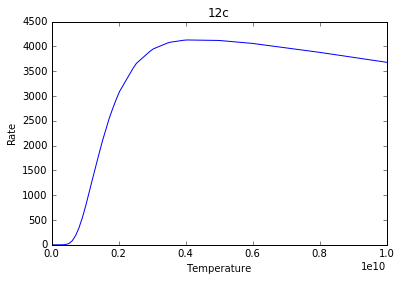

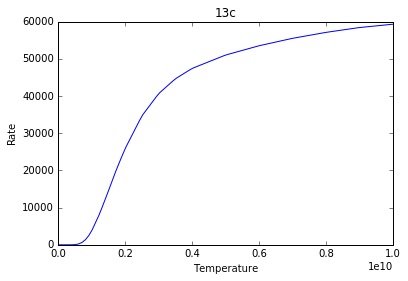

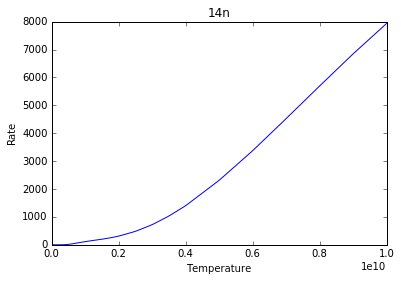

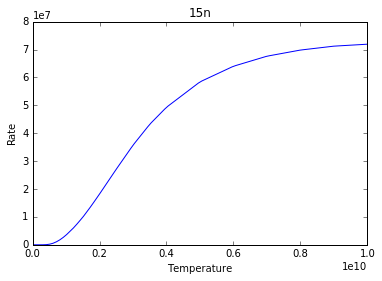

In [74]:
% pylab inline
def get_rates(element, temperatures, plot=False):
    """
    Reads reaction rates from NACRE and interpolates for a given temperature.
    
    Inputs:
        - element: One of "12c", "13c", "14n", "15n".
        - temperature: The temperature for which the rate is desired. Should be between (1e9 * 0.008) and (1e9 * 10.0).
    
    Output:
        - The rate.
    Note: Some elements support lower temperatures as well, see NACRE charts.
    """
    # Safety tests.
    assert len(element) == 3, "Element should be one of '12c', '13c', '14n', '15n'."
    assert int(element[:2]), "Element should be one of '12c', '13c', '14n', '15n'."
    assert len(temperatures) >= 1, "Include a temperature."
    # Open and handle the file.
    from glob import glob
    file = glob("elements/" + str(element) + "*.dat")[0]
    # Parse data.
    rows = [x.strip().split()[:2] for x in open(file).read().split("\n")][1:]
    temps,rates = zip(*[(float(temp) * 1e9, float(rate)) for temp, rate in rows])
    # Figure out interpolated rate.
    from scipy.interpolate import interp1d
    interpolated_function = interp1d(temps, rates)
    return interpolated_function(temperatures)
    
    
from numpy import linspace
from matplotlib.pyplot import plot
demo_temperatures = linspace(1e9 * 0.008, 1e9 * 10.0, num=100)
for element in ["12c", "13c", "14n", "15n"]:
    interpolated_rates = get_rates(element, demo_temperatures)
    title(element)
    xlabel("Temperature")
    ylabel("Rate")
    plot(demo_temperatures, interpolated_rates)
    show()